### Import required libraries

In [4]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 521.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

### Data Path

In [ ]:
# Paths
TRAIN_DIR = 'images/train' # train data
TEST_DIR = 'images/test' # test/validation data

In [7]:
# Create dataframe with image paths and labels
def createdataframe(dir):
    image_paths, labels = [], []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


### Image Preprocessing

In [11]:
# Image preprocessing
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features).reshape(len(features), 48, 48, 1)
    return features

x_train = extract_features(train['image']) / 255.0
x_test = extract_features(test['image']) / 255.0

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\imluc\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

### Label Encoding

In [12]:
le = LabelEncoder()
le.fit(train['label'])  # Fit on training labels
y_train = to_categorical(le.transform(train['label']), num_classes=7)
y_test = to_categorical(le.transform(test['label']), num_classes=7)

### CNN Model

In [13]:
model = Sequential([
    Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),  # Converts 2D to 1D
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # Output layer (7 emotions)
])

c:\Users\imluc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training & Plots

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 91s 390ms/step - accuracy: 0.2367 - loss: 1.8369 - val_accuracy: 0.2627 - val_loss: 1.7936
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 91s 404ms/step - accuracy: 0.2478 - loss: 1.8074 - val_accuracy: 0.2930 - val_loss: 1.7171
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 93s 413ms/step - accuracy: 0.3006 - loss: 1.7157 - val_accuracy: 0.3888 - val_loss: 1.5535
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 93s 411ms/step - accuracy: 0.3616 - loss: 1.6054 - val_accuracy: 0.4581 - val_loss: 1.4248
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 93s 412ms/step - accuracy: 0.4214 - loss: 1.4854 - val_accuracy: 0.4917 - val_loss: 1.3449
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 94s 415ms/step - accuracy: 0.4466 - loss: 1.4282 - val_accuracy: 0.4935 - val_loss: 1.3253
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 94s 415ms/step - accuracy: 0.4691 - loss: 1.3855 - val_accuracy: 0.5071 - val_loss: 1.2797
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 93s 414ms/step - accuracy: 0.4858 -

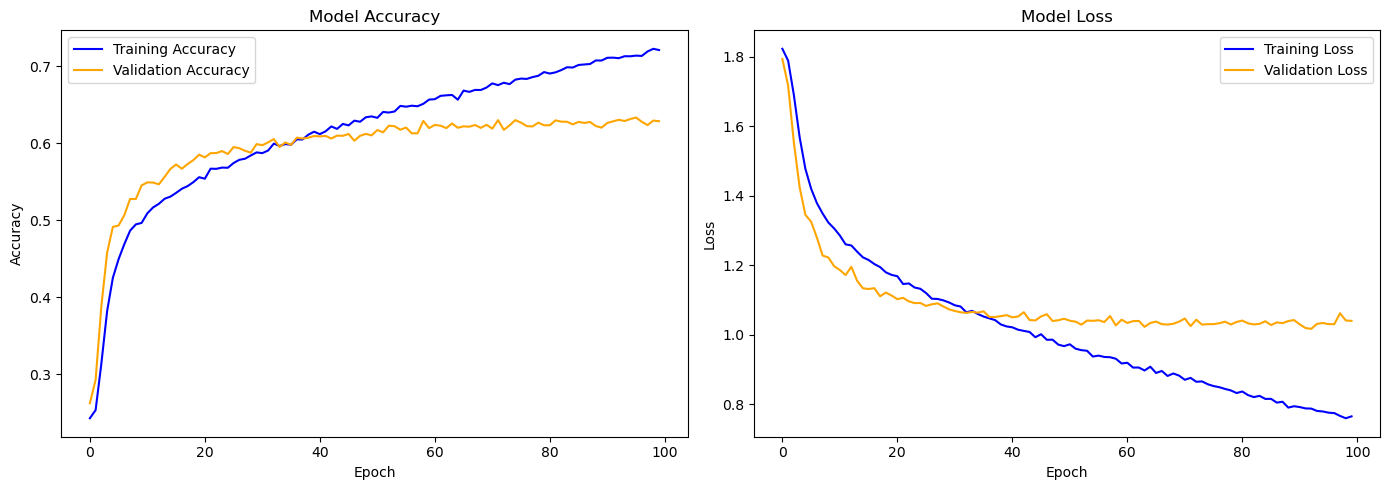

In [18]:
plt.figure(figsize=(14, 5))

history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Save Models

In [19]:
model.save('emotiondetector.h5')  # Save weights + architecture
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model.to_json())  # Save just architecture (optional)